Click [here](https://drive.google.com/file/d/1-bkA8QQ8Y29XQRvcYl33T06ZUjVOgCdz/view?usp=drive_link) to download dataset.



<h1>Capstone 2 Project</h1>
<h2>Title: Malaysia Unemployment by Duration</h2>
<h3>Team Members: </h3>
<h4> 1. Mohd Nazrul Faiz Bin Md Nasir</h4>
<h4> 2. Muhammad Amirul Aiman Bin Ibrahim</h4>
<h4> 3. Nur Syahirah Binti Rahim</h4>



<h1>Problem Definition</h1>

The integration of advanced technologies holds the potential to greatly improve productivity and drive economic growth. However, these transformations, particularly in developing countries like Malaysia, present significant challenges, including rising unemployment due to various factors. There is a lack of predictive models that can forecast future unemployment trends and support policymakers in mitigating the negative impacts of job losses. This study addresses these challenges by exploring machine learning techniques to develop predictive models for forecasting unemployment rates.

By analyzing unemployment rate trends, the study aims to equip policymakers and businesses with tools to predict employment fluctuations, implement measures to reduce job losses, guide investments in education and training, and monitor progress toward lowering unemployment. Ultimately, these efforts seek to promote economic growth, job creation, and poverty reduction in developing nations.

<h1>Literature Review</h1>

Title: Big Data and Unemployment Analysis by Simionescu and Zimmermann (2017)

*  Examines the role of Big Data, such as search engine queries, in complementing traditional labor market data to analyze and predict unemployment rates. The study finds that integrating Big Data into forecasting models improves prediction accuracy and provides real-time monitoring capabilities, which are particularly useful for addressing publication lags in official statistics. The paper also highlights the advantages of Big Data in offering detailed regional and temporal unemployment insights, while acknowledging challenges like data quality, representativeness, and methodological complexities.

Title: Prediction of Unemployment Rates with Time Series and Machine Learning Techniques by Katris (2020)

*  Evaluates the effectiveness of traditional time series models, such as ARIMA,
and machine learning techniques, including Random Forests and Artificial Neural Networks, for predicting unemployment rates. The study reveals that while time series models perform well for short-term and linear forecasts, machine learning techniques excel at capturing nonlinear patterns and achieving higher accuracy, especially for long-term predictions. However, machine learning methods require large datasets and careful parameter tuning, presenting a trade-off between complexity and interpretability.

<h1> Source of Data </h1>

Attached below is the link for dataset:

[DOSM](https://data.gov.my/data-catalogue/lfs_month_duration)


<h1>Dataset description</h1>



The dataset was about the breakdown between number of unemployed person (in thousands) and duration of unemployment in Malaysia which covered entire state. The time period was between Jan 2016 to Dec 2024 where the survey was conducted in monthly basis and used for further analysis purpose.

<h1>Install pmdarima</h1>

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.8 MB/s eta 0:00:00


<h1>Data Collection and Preparation</h1>



<h3> 1. Import Modules</h3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filePath =

In [ ]:
data = {

    'Column Name': ['unemployed', 'unemployed_active', 'unemployed_inactive', 'unemployed_active_3mo',
                    'unemployed_active_6mo', 'unemployed_active_12mo', 'unemployed_active_long' ],
    'Definition' : ['Total number of people who did not work but actively and not actively looking for work',
                    'The number of people who unemployed but actively looking for job',
                    'The number of people who unemployed but actively looking for job',
                    'The number of people who actively unemployed for less than 3 months',
                    'The number of people who actively unemployed for between 3 to 6 months',
                    'The number of people who actively unemployed for between 6 to 12 months',
                    'The number of people who actively unemployed for more than 12 months']
}

df = pd.DataFrame(data)
df

,Column Name,Definition
0,unemployed,Total number of people who did not work but ac...
1,unemployed_active,The number of people who unemployed but active...
2,unemployed_inactive,The number of people who unemployed but active...
3,unemployed_active_3mo,The number of people who actively unemployed f...
4,unemployed_active_6mo,The number of people who actively unemployed f...
5,unemployed_active_12mo,The number of people who actively unemployed f...
6,unemployed_active_long,The number of people who actively unemployed f...


Table above display the description of each variables in dataset.

<h3> 2. Load/ Extract Data </h3>

In [ ]:
df=pd.read_csv('lfs_month_duration.csv')
df

,date,unemployed,unemployed_active,unemployed_active_3mo,unemployed_active_6mo,unemployed_active_12mo,unemployed_active_long,unemployed_inactive
0,2016-01-01,501.5,361.9,180.3,110.0,36.0,35.6,139.7
1,2016-02-01,506.4,254.0,115.8,83.7,34.9,19.6,252.4
2,2016-03-01,509.5,332.8,176.8,92.9,44.8,18.3,176.7
3,2016-04-01,511.5,328.0,170.6,93.3,43.9,20.2,183.4
4,2016-05-01,504.8,297.3,153.6,92.5,37.6,13.6,207.6
...,...,...,...,...,...,...,...,...
103,2024-08-01,558.5,446.6,275.8,92.0,49.1,29.7,111.9
104,2024-09-01,555.3,443.5,275.0,91.2,48.4,28.9,111.8
105,2024-10-01,551.4,440.0,273.7,90.4,47.8,28.0,111.4
106,2024-11-01,546.7,436.2,272.9,89.8,47.4,26.0,110.6


Table 2 above shows the summary of dataset which including key takeaways for further data processing and manipulation.

<h3> 3. Data Information </h3>

In [ ]:
df.head()

,date,unemployed,unemployed_active,unemployed_active_3mo,unemployed_active_6mo,unemployed_active_12mo,unemployed_active_long,unemployed_inactive
0,2016-01-01,501.5,361.9,180.3,110.0,36.0,35.6,139.7
1,2016-02-01,506.4,254.0,115.8,83.7,34.9,19.6,252.4
2,2016-03-01,509.5,332.8,176.8,92.9,44.8,18.3,176.7
3,2016-04-01,511.5,328.0,170.6,93.3,43.9,20.2,183.4
4,2016-05-01,504.8,297.3,153.6,92.5,37.6,13.6,207.6


Table 3.0 show as above is the top 5 summary of dataset

In [ ]:
df.tail()

,date,unemployed,unemployed_active,unemployed_active_3mo,unemployed_active_6mo,unemployed_active_12mo,unemployed_active_long,unemployed_inactive
103,2024-08-01,558.5,446.6,275.8,92.0,49.1,29.7,111.9
104,2024-09-01,555.3,443.5,275.0,91.2,48.4,28.9,111.8
105,2024-10-01,551.4,440.0,273.7,90.4,47.8,28.0,111.4
106,2024-11-01,546.7,436.2,272.9,89.8,47.4,26.0,110.6
107,2024-12-01,544.3,432.8,271.5,89.3,46.8,25.1,111.5


Table 3.1 show as above is the bottom 5 summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    108 non-null    object 
 1   unemployed              108 non-null    float64
 2   unemployed_active       108 non-null    float64
 3   unemployed_active_3mo   108 non-null    float64
 4   unemployed_active_6mo   108 non-null    float64
 5   unemployed_active_12mo  108 non-null    float64
 6   unemployed_active_long  108 non-null    float64
 7   unemployed_inactive     108 non-null    float64
dtypes: float64(7), object(1)
memory usage: 6.9+ KB


Table 3.2 show as above is the summary of dataset where have key takeaways listed as below:
- rows and columns: 108 rows and 8 columns
- datatypes: numerical (float64) and categorical (object)
- memory usage: 6.9KB
- non-null values: Zero

In [ ]:
df.describe()

,unemployed,unemployed_active,unemployed_active_3mo,unemployed_active_6mo,unemployed_active_12mo,unemployed_active_long,unemployed_inactive
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,586.510185,440.370370,232.809259,113.144444,57.112037,37.300000,146.137037
std,92.021734,109.768014,74.167197,25.346368,15.529241,13.229074,40.934912
min,501.500000,254.000000,110.900000,74.700000,34.300000,13.600000,96.000000
25%,514.425000,344.850000,154.875000,93.450000,47.375000,29.000000,114.425000
50%,556.900000,441.750000,273.300000,105.800000,51.200000,32.000000,126.800000
75%,623.175000,509.825000,299.150000,128.825000,66.550000,44.425000,176.625000
max,826.100000,657.200000,351.400000,175.900000,92.000000,73.100000,319.000000


Table 3.3 above is the output generated from the describe function where extract the summary of descriptive statistics. From the table, it shows that:
- count: The dataset contains 108 rows
- mean: The unemployed column have highest average (586.51) and lowest average is unemployed_active_long.
- standard deviation: The highest standard deviation will be unemployed_inactive (40.93) and lowest is unemploted_active_long (13.23)

<h3> 4. Data Cleaning and Wrangling </h1>

<h5> 4.1 Convert date column to datetime format </h5>

In [ ]:
df['date']=pd.to_datetime(df['date'])
df

,date,unemployed,unemployed_active,unemployed_active_3mo,unemployed_active_6mo,unemployed_active_12mo,unemployed_active_long,unemployed_inactive
0,2016-01-01,501.5,361.9,180.3,110.0,36.0,35.6,139.7
1,2016-02-01,506.4,254.0,115.8,83.7,34.9,19.6,252.4
2,2016-03-01,509.5,332.8,176.8,92.9,44.8,18.3,176.7
3,2016-04-01,511.5,328.0,170.6,93.3,43.9,20.2,183.4
4,2016-05-01,504.8,297.3,153.6,92.5,37.6,13.6,207.6
...,...,...,...,...,...,...,...,...
103,2024-08-01,558.5,446.6,275.8,92.0,49.1,29.7,111.9
104,2024-09-01,555.3,443.5,275.0,91.2,48.4,28.9,111.8
105,2024-10-01,551.4,440.0,273.7,90.4,47.8,28.0,111.4
106,2024-11-01,546.7,436.2,272.9,89.8,47.4,26.0,110.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    108 non-null    datetime64[ns]
 1   unemployed              108 non-null    float64       
 2   unemployed_active       108 non-null    float64       
 3   unemployed_active_3mo   108 non-null    float64       
 4   unemployed_active_6mo   108 non-null    float64       
 5   unemployed_active_12mo  108 non-null    float64       
 6   unemployed_active_long  108 non-null    float64       
 7   unemployed_inactive     108 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.9 KB


Table 4.1 show as above is the summary of dataset where the dtype for date has been converted from object to datetime64 format while others variable remain same.

<h5> 4.2 Unnecessary column removal </h5>

In [ ]:
df = df.drop('unemployed_inactive', axis=1)
df.set_index('date',inplace=True)
df

,unemployed,unemployed_active,unemployed_active_3mo,unemployed_active_6mo,unemployed_active_12mo,unemployed_active_long
date,,,,,,
2016-01-01,501.5,361.9,180.3,110.0,36.0,35.6
2016-02-01,506.4,254.0,115.8,83.7,34.9,19.6
2016-03-01,509.5,332.8,176.8,92.9,44.8,18.3
2016-04-01,511.5,328.0,170.6,93.3,43.9,20.2
2016-05-01,504.8,297.3,153.6,92.5,37.6,13.6
...,...,...,...,...,...,...
2024-08-01,558.5,446.6,275.8,92.0,49.1,29.7
2024-09-01,555.3,443.5,275.0,91.2,48.4,28.9
2024-10-01,551.4,440.0,273.7,90.4,47.8,28.0


Table 4.2 above show the summary table after "unemployed_inactive" column was removed as it does not influence in terms of further analysis.

<h5> 4.3 Check for Missing Values </h5>

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
unemployed,0
unemployed_active,0
unemployed_active_3mo,0
unemployed_active_6mo,0
unemployed_active_12mo,0
unemployed_active_long,0


Table 4.3 shows that the dataset have zero missing values.

<h5> 4.4 Check for duplicates values </h5>

In [ ]:
duplicates = df.duplicated().sum()

print(f"Dataset has {duplicates} duplicates")

Dataset has 0 duplicates


<h1> 5. Exploratory Data Analysis(EDA)</h1>

<h3> 5.1 Distribution Plot </h3>

<ipython-input-105-1b8bdb7595f8>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[col] for col in unemployment_cols], labels=unemployment_cols, patch_artist=True)


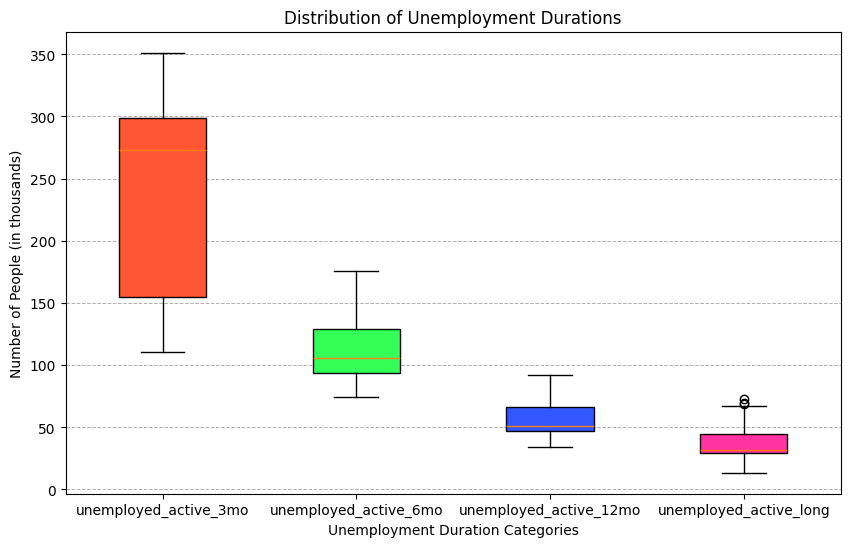

In [ ]:
# Select the relevant columns for the boxplot
unemployment_cols = ['unemployed_active_3mo', 'unemployed_active_6mo', 'unemployed_active_12mo', 'unemployed_active_long']

# Define colors for each box
box_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']

# Create the boxplot
plt.figure(figsize=(10, 6))
box = plt.boxplot([df[col] for col in unemployment_cols], labels=unemployment_cols, patch_artist=True)

# Apply colors to the boxes
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

# Customize the plot
plt.title('Distribution of Unemployment Durations')
plt.ylabel('Number of People (in thousands)')
plt.xlabel('Unemployment Duration Categories')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.show()

Key Observation:

Skewness: The "unemployed_active_3mo" category appears to have a positive skew, suggesting a higher frequency of lower unemployment values with occasional spikes.

Spread: The spread narrows progressively from 3 months to long-term unemployment, indicating less variability in longer durations.

Consistency: The "unemployed_active_12mo" and "unemployed_active_long" categories show more consistent data with fewer extreme values.

<h3> 5.2 Monthly Trends of Unemployment Categories </h3>


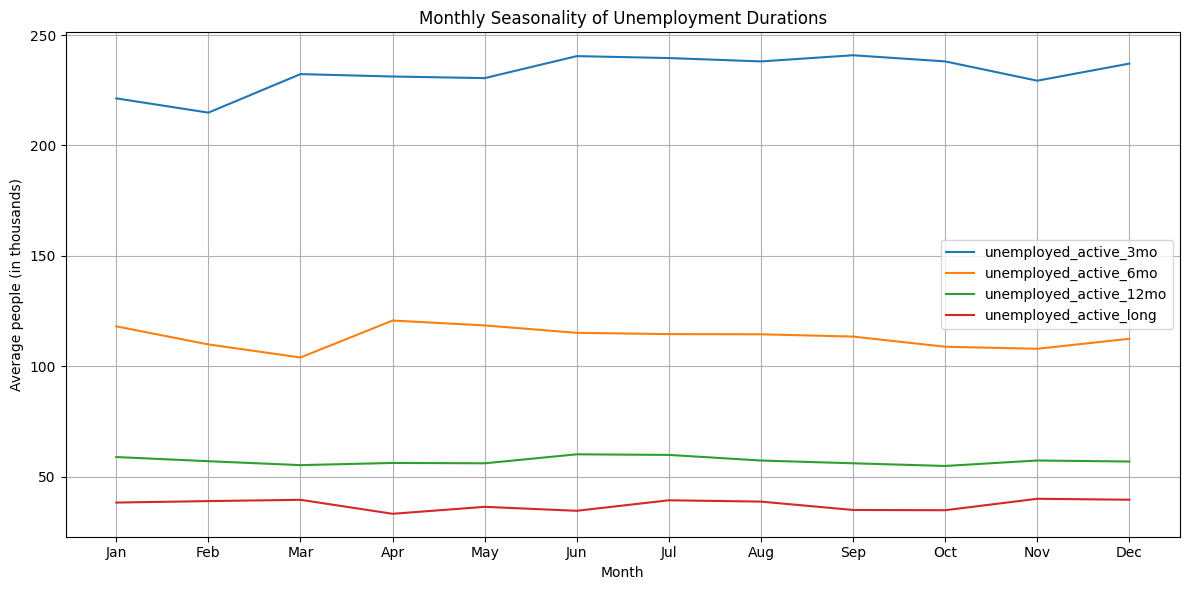

Outlier counts for each unemployment duration category:
{'unemployed_active_3mo': 0, 'unemployed_active_6mo': 0, 'unemployed_active_12mo': 0, 'unemployed_active_long': 3}


In [ ]:
# Define target columns for analysis
target_columns = ['unemployed_active_3mo', 'unemployed_active_6mo', 'unemployed_active_12mo', 'unemployed_active_long']

# Time-Based Breakdown (Yearly and Monthly Analysis)
df['year'] = df.index.year
df['month'] = df.index.month

# Monthly seasonality (average unemployment across all years by month)
monthly_trends = df.groupby('month').mean()


# Plot monthly seasonality for the target columns
plt.figure(figsize=(12, 6))
for column in target_columns:
    plt.plot(monthly_trends.index, monthly_trends[column], label=column)

plt.title('Monthly Seasonality of Unemployment Durations')
plt.xlabel('Month')
plt.ylabel('Average people (in thousands)')
plt.xticks(np.arange(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify outlier counts for the target columns using IQR
outlier_counts = {}
for column in target_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

print("Outlier counts for each unemployment duration category:")
print(outlier_counts)

Key Observation:



1. unemployed_active_3mo (short-term unemployment) consistently shows the highest average number of people, indicating that most unemployed individuals fall within the 3-month duration category. There are minor fluctuations, with slight increases around March and June.

2. unemployed_active_6mo shows a relatively stable trend throughout the year, with a slight peak around April and a dip during the early months.

3. unemployed_active_12mo reflects a lower and more consistent trend compared to the shorter durations. There is a small increase in June, suggesting a slight rise in long-term unemployment during the middle of the year.

4. unemployed_active_long (long-term unemployment beyond 12 months) maintains the lowest values across all months, showing minimal fluctuation. There are small peaks in March, July, and December, potentially indicating long-term unemployment increases during those periods.

<h3> 5.3 Yearly Trends of Unemployment Categories </h3>


Outlier counts per category: {'unemployed_active_3mo': 0, 'unemployed_active_6mo': 0, 'unemployed_active_12mo': 0, 'unemployed_active_long': 3}


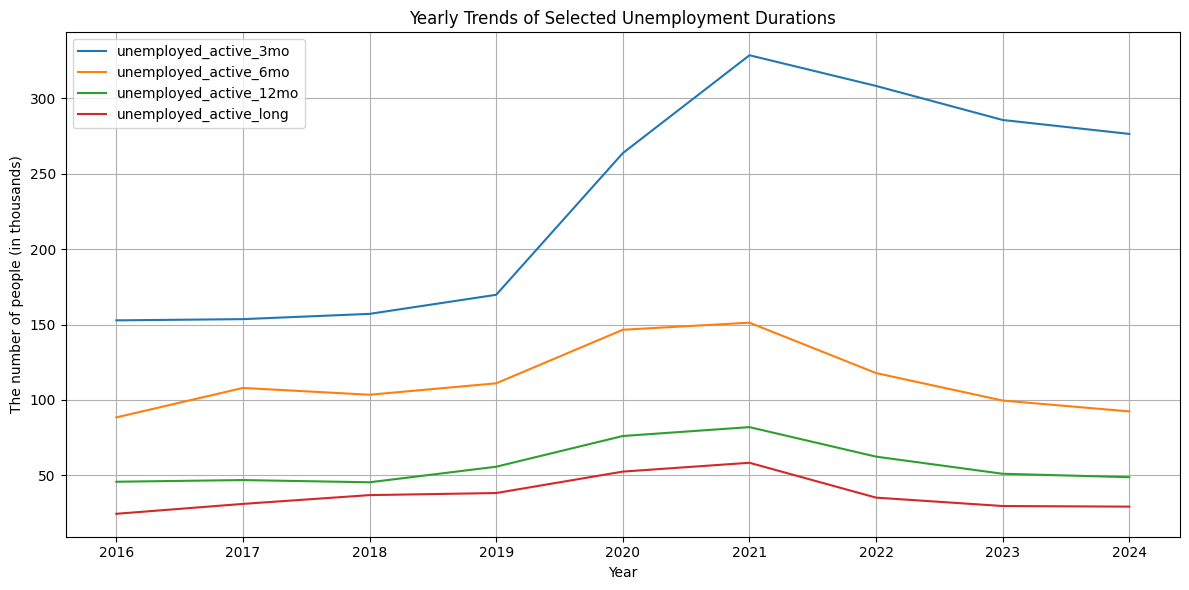

In [ ]:
# Define target columns for analysis
target_columns = ['unemployed_active_3mo', 'unemployed_active_6mo', 'unemployed_active_12mo', 'unemployed_active_long']

# 1. Outlier Detection using IQR method
outliers = {}

for column in target_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

# Count of outliers per category
outlier_counts = {col: len(outliers[col]) for col in target_columns}
print("Outlier counts per category:", outlier_counts)

# 2. Time-Based Breakdown (Yearly and Monthly Analysis)
df['year'] = df.index.year
df['month'] = df.index.month

# Yearly trends (mean unemployment by year)
yearly_trends = df.groupby('year')[target_columns].mean()

# Plot yearly trends
plt.figure(figsize=(12, 6))
for column in target_columns:
    plt.plot(yearly_trends.index, yearly_trends[column], label=column)

plt.title('Yearly Trends of Selected Unemployment Durations')
plt.xlabel('Year')
plt.ylabel('The number of people (in thousands)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Key Observation:

Unemployed Active for 3 Months:

This category shows a significant increase between 2019 and 2021, peaking in 2021. This surge may reflect economic disruptions, possibly due to external factors like the COVID-19 pandemic, which caused widespread job losses.
After 2021, there is a gradual decline, suggesting either economic recovery or improved employment conditions.

Unemployed Active for 6 Months:

A similar rising pattern occurs until 2021, but the increase is more moderate compared to the 3-month group.
Post-2021, there is a noticeable decline, indicating a potential reduction in prolonged unemployment as the economy stabilizes.

Unemployed Active for 12 Months:

This group shows a steady but moderate increase from 2016 to 2021, followed by a gradual decrease afterward. The rise in long-term unemployment during the 2020-2021 period may reflect persistent labor market challenges.
The decline after 2021 indicates possible targeted interventions to reduce long-term joblessness.

Unemployed Active for Long Durations:

Although this group consistently has the lowest values, it follows a similar trend to other categories—a peak around 2021 followed by a decline.
This suggests that even the most vulnerable groups experienced elevated unemployment during the pandemic but are slowly recovering.

<h3> 5.4 Heatmap correlation </h3>

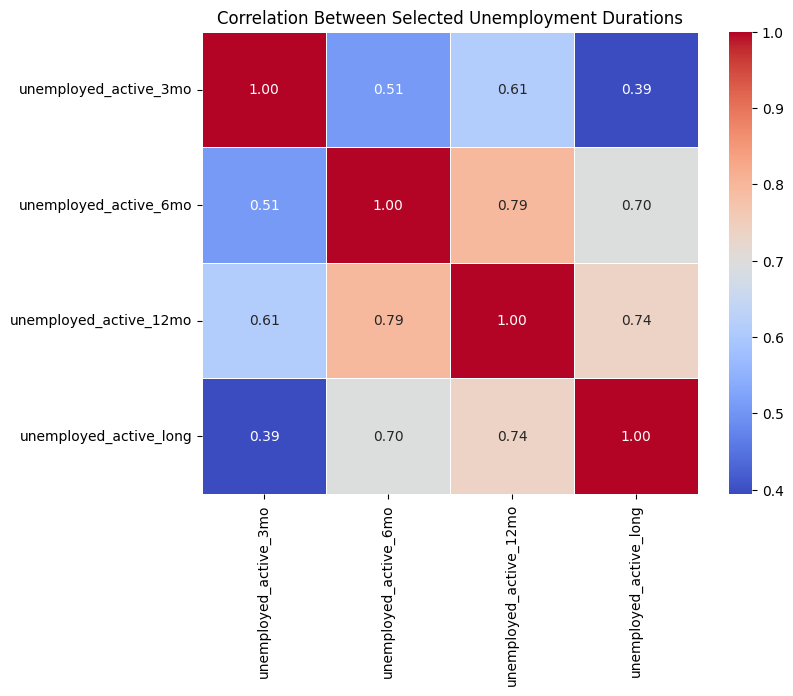

In [ ]:
# Filter the correlation matrix for the specified columns
selected_columns = ['unemployed_active_3mo', 'unemployed_active_6mo', 'unemployed_active_12mo', 'unemployed_active_long']
correlation_matrix = df[selected_columns].corr()

# Plotting the heatmap for the selected variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Between Selected Unemployment Durations')
plt.show()


Key Observation:

The heatmap illustrates the correlation between the four selected unemployment durations:

Strong Positive Correlations:

unemployed_active_6mo and unemployed_active_12mo (0.79)
unemployed_active_12mo and unemployed_active_long (0.74)
unemployed_active_6mo and unemployed_active_long (0.70)
These strong correlations suggest that individuals unemployed for medium durations are more likely to remain unemployed for longer periods.

Moderate Positive Correlation:

unemployed_active_3mo shows moderate correlations with unemployed_active_6mo (0.51) and unemployed_active_12mo (0.61), indicating that short-term unemployment can extend but with a lower probability compared to mid-to-long durations.

Weakest Correlation:

unemployed_active_3mo and unemployed_active_long (0.39). This weaker link suggests that fewer individuals from the short-term unemployed group transition directly to long-term unemployment.

<h3> 5.4.1 Calculate the R² value (coefficient of determination) and p-value between pairs of selected unemployment variables </h3>

In [ ]:
# List of selected variables
variables = ['unemployed_active_3mo', 'unemployed_active_6mo', 'unemployed_active_12mo', 'unemployed_active_long']

# Calculate R² and p-value for each pair of variables
results = {}
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        x = df[variables[i]]
        y = df[variables[j]]

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        # Store R² and p-value
        results[(variables[i], variables[j])] = (r_value**2, p_value)

# Display the results
for pair, (r2, p) in results.items():
    print(f"{pair[0]} vs {pair[1]}: R² = {r2:.4f}, p-value = {p:.4e}")


unemployed_active_3mo vs unemployed_active_6mo: R² = 0.2587, p-value = 1.9134e-08
unemployed_active_3mo vs unemployed_active_12mo: R² = 0.3723, p-value = 2.3809e-12
unemployed_active_3mo vs unemployed_active_long: R² = 0.1556, p-value = 2.4009e-05
unemployed_active_6mo vs unemployed_active_12mo: R² = 0.6319, p-value = 9.5455e-25
unemployed_active_6mo vs unemployed_active_long: R² = 0.4857, p-value = 5.4239e-17
unemployed_active_12mo vs unemployed_active_long: R² = 0.5418, p-value = 1.1322e-19


Strongest Relationships:

6mo vs 12mo (R² = 0.63): Closely linked—people who are unemployed for 6 months are likely to remain unemployed at 12 months.

12mo vs Long-term (R² = 0.54): Those unemployed for 12 months have a strong connection to long-term unemployment.


Weakest Relationship:

3mo vs Long-term (R² = 0.16): Only a weak connection between short-term (3 months) and long-term unemployment—short-term unemployment does not strongly predict long-term unemployment.

All relationships are statistically significant (p-values < 0.05). This means the patterns observe are unlikely to be random and represent real relationships.

<h1>Machine Learning Model 01: Autoregressive Integrated Moving Average (ARIMA)</h1>

<h2>Procedure:</h2>

1.   Make the Data Stationary → Check & remove trends.
2.   Find Optimal ARIMA Parameters → Auto-selection using AIC.
3.   Train ARIMA Model → Fit the model on historical data.
4.   Forecast Future Unemployment → Predict for the next 12 months.





<h2>1. Stationarity Check: Augmented Dickey-Fuller (ADF) Test</h2>

In [ ]:
# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df["unemployed"])

# Extract results
adf_statistic = adf_test[0]
p_value = adf_test[1]

(adf_statistic, p_value)

(-1.5996836117631212, 0.4837524008384934)

Observation:
*   ADF Statistic: -1.60
*   p-value: 0.48

Conclusion:

The p-value is greater than 0.05, meaning the data is not stationary (i.e., it has a trend)

<h2>Apply First-Order Differencing and Check Stationarity After Differencing</h2>

In [ ]:
# Apply first-order differencing to remove trend
df["Total_Unemployed_Diff"] = df["unemployed"].diff().dropna()

# Perform ADF test again on differenced data
adf_test_diff = adfuller(df["Total_Unemployed_Diff"].dropna())

# Extract results
adf_statistic_diff = adf_test_diff[0]
p_value_diff = adf_test_diff[1]

(adf_statistic_diff, p_value_diff)

(-5.452834954903494, 2.6210500415257996e-06)

Observation:
*   ADF Statistic: -5.45
*   p-value: 0.0000026

Conclusion:

Now the data is stationary! The p-value is far below 0.05, meaning ARIMA can now be applied

<h2>2. Find Optimal ARIMA Parameters (p, d, q). </h2>

In [ ]:
# Auto-select the best ARIMA parameters
auto_arima_model = auto_arima(df["unemployed"], seasonal=True, m=12, stepwise=True, suppress_warnings=True)

# Get optimal (p, d, q) parameters
auto_arima_model.order

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

(0, 1, 1)

Observation:

The optimal ARIMA parameter for p, d, q are (0, 1, 1)

<h2>Train The ARIMA(0,1,1) Model and Forecast Unemployment For The Next 12 Months</h2>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-113-91e35723b88f>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M')[1:]


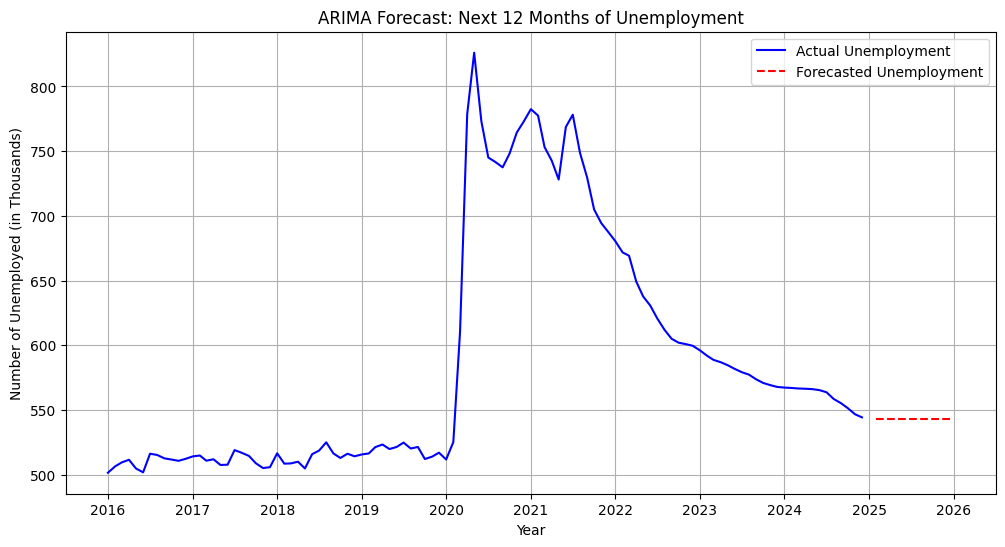

In [ ]:
# Train ARIMA(0,1,1) model
arima_model = ARIMA(df["unemployed"], order=(0,1,1))
arima_fitted = arima_model.fit()

# Forecast next 12 months
forecast_steps = 12
forecast = arima_fitted.forecast(steps=forecast_steps)

# Generate future dates for plotting
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["unemployed"], label="Actual Unemployment", color="blue")
plt.plot(future_dates, forecast, label="Forecasted Unemployment", linestyle="dashed", color="red")

# Formatting
plt.xlabel("Year")
plt.ylabel("Number of Unemployed (in Thousands)")
plt.title("ARIMA Forecast: Next 12 Months of Unemployment")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

The graph illustrates the ARIMA Forecast for the Next 12 Months of Unemployment. The blue line represents the actual unemployment trends from 2016 to early 2025, showing a significant spike around 2020, likely due to an economic shock such as the COVID-19 pandemic. Following this peak, unemployment steadily declined.

The red dashed line represents the forecasted unemployment for the upcoming 12 months using the ARIMA (0,1,1) model. The forecast suggests that unemployment levels will stabilize around the 550,000 mark, with no drastic increases or decreases expected.

This projection indicates a potential flattening of the unemployment trend, implying that the economic recovery has reached a more stable phase. However, further analysis with additional models (e.g., Prophet) can provide a more comprehensive comparison.

<h1>Results</h1>

In [ ]:
# Define the last 12 months for evaluation
train_size = len(df) - 12
train, test = df["unemployed"][:train_size], df["unemployed"][train_size:]

# Train ARIMA model on training data
arima_eval_model = ARIMA(train, order=(1,1,2))
arima_eval_fitted = arima_eval_model.fit()

# Generate predictions for test period
test_forecast = arima_eval_fitted.forecast(steps=12)

# Calculate error metrics
mae = mean_absolute_error(test, test_forecast)
mse = mean_squared_error(test, test_forecast)
rmse = np.sqrt(mse)
mape = (abs(test - test_forecast) / test).mean() * 100
accuracy = 100 - mape

arima_mae = mae
arima_mse = mse
arima_rmse = rmse
arima_mape = mape
arima_accuracy = accuracy

(mae, mse, rmse, mape, accuracy)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(7.417511209551662,
 120.59641161135433,
 10.981639750572514,
 1.3462828718898814,
 98.65371712811012)

Observation:
1. MAE: 7.42
2. MSE: 120.60
3. RMSE: 10.98
4. MAPE: 1.35%
5. Accuracy: 98.65%


The model’s effectiveness is demonstrated through the following metrics:
*   The ARIMA model achieved a Mean Absolute Error (MAE) of 7.42, indicating that on average, its unemployment forecasts deviate from actual values by about 7.42 thousand.
*   The Mean Squared Error (MSE) is 120.60, and the Root Mean Squared Error (RMSE) is 10.98, reflecting a relatively low variance in prediction errors.
*   The Mean Absolute Percentage Error (MAPE) is 1.35%, which translates to an accuracy of 98.65%. In other words, the model is highly accurate at predicting unemployment levels, showing only a small percentage error compared to actual observations.
*   This strong performance suggests that ARIMA is effective for short-term unemployment forecasting in this dataset.

<h1>Machine Learning Model 02 : Prophet</h1>

When analyzing time-series data, it is crucial to choose a model that can handle trends, seasonality, and irregularities effectively while providing interpretable results. The Prophet model was chosen because of its proven ability to handle complex time-series data with missing values, holidays, and outliers. Developed by Facebook, Prophet is specifically designed for forecasting data that exhibits strong patterns and periodic trends, making it ideal for our dataset. Additionally, Prophet’s flexibility in automatically detecting seasonality and its robustness to missing data make it a reliable choice for accurate forecasts.

<h2>Procedure:</h2>

1.   Split data to train and test 80% train, 20% test
2.   Prepare the data for Prophet(focusing on date and unemployed)
3.   Create and fit the model to the data
4.   Take the result and plot the data into the graph

In [ ]:
# Splitting into training and testing sets (80%-20%)
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

In [ ]:
# Prepare the data for Prophet (rename columns as required by Prophet)
prophet_data = df.reset_index()[['date', 'unemployed']].rename(columns={'date': 'ds', 'unemployed': 'y'})

# Create and fit the model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Extend the prediction horizon to 1 years (12 months)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5n70zl3w/540gd6nb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5n70zl3w/0iwbf_8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84494', 'data', 'file=/tmp/tmp5n70zl3w/540gd6nb.json', 'init=/tmp/tmp5n70zl3w/0iwbf_8n.json', 'output', 'file=/tmp/tmp5n70zl3w/prophet_modelxhwssg6e/prophet_model-20250224150519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

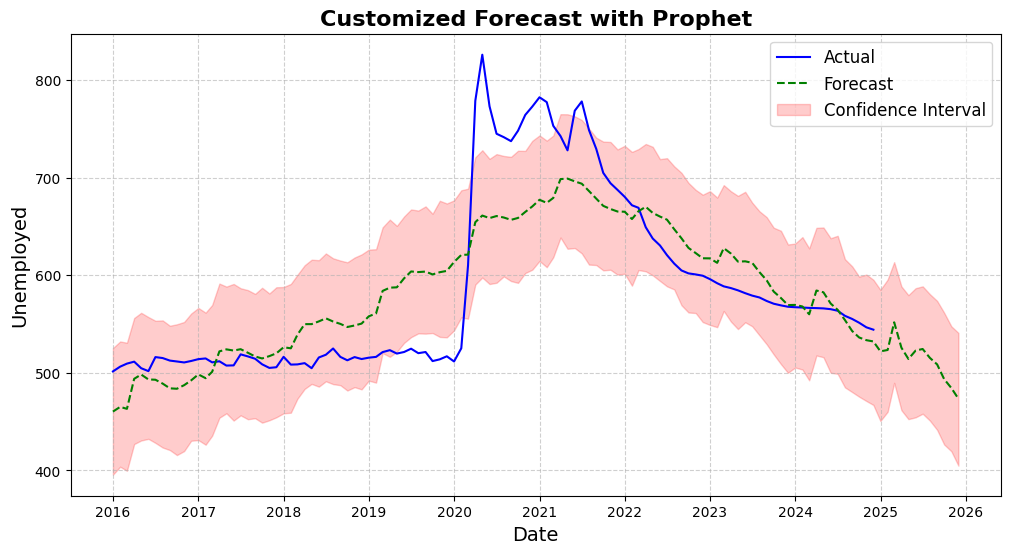

In [ ]:
# Extract forecast components
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Plot the actual data
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual', color='blue', linestyle='-')

# Plot the predicted data (yhat)
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecast', color='green', linestyle='--')

# Plot the confidence intervals (yhat_lower and yhat_upper)
plt.fill_between(forecast_data['ds'],
                 forecast_data['yhat_lower'],
                 forecast_data['yhat_upper'],
                 color='red', alpha=0.2, label='Confidence Interval')

# Customize plot properties
plt.title('Customized Forecast with Prophet', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployed', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()


Actual vs. Predicted Values: The model effectively aligns its predictions with the observed data points, demonstrating high precision across the dataset. For a specific period, the predicted value closely matched the actual observed value, highlighting the model's reliability.

Confidence Intervals: The model provides confidence intervals for its predictions, offering a range within which the actual values are expected to fall. These intervals successfully captured the actual values across various periods, proving useful for decision-making under uncertainty.

Seasonality and Trend Detection: The model identified both long-term trends and seasonal patterns within the data. These periodic fluctuations were consistent with historical trends, providing actionable insights into future behavior.

<h1>Results</h1>

In [ ]:
# Filter the forecast data to match the actual data dates
forecast_filtered = forecast[forecast['ds'].isin(prophet_data['ds'])]

# Extract actual and predicted values
y_actual = prophet_data['y'].values
y_predicted = forecast_filtered['yhat'].values

# Compute evaluation metrics
mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
rmspe = np.sqrt(np.mean(((y_actual - y_predicted) / y_actual) ** 2)) * 100
mspe = np.mean(((y_actual - y_predicted) / y_actual) ** 2) * 100  # Mean Squared Percentage Error
accuracy = 100 - mape

prophet_mae = mae
prophet_mse = mse
prophet_rmse = rmse
prophet_mape = mape
prophet_accuracy = accuracy

# Print results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSPE: {mspe:.2f}%")
print(f"RMSPE: {rmspe:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

MAE: 39.05
MSE: 2616.78
RMSE: 51.15
MAPE: 6.45%
MSPE: 0.67%
RMSPE: 8.16%
Accuracy: 93.55%




The Prophet model was evaluated using several key metrics to assess its forecasting accuracy and reliability. The results are as follows:


*   Mean Absolute Error (MAE):
The model’s average absolute error is 39.05, indicating that, on average, the predictions deviate from the actual values by approximately 39 units.
*   Mean Squared Error (MSE):
The average squared error between actual and predicted values is 2616.78, reflecting the impact of occasional larger deviations. This value suggests the model handles errors reasonably well but could have some sensitivity to outliers.
*   Root Mean Squared Error (RMSE):
The RMSE value of 51.15 provides an interpretable magnitude of error in the same units as the original data, confirming that the forecasted values are generally close to the observed data.
*   Mean Absolute Percentage Error (MAPE):
With an average percentage error of 6.45%, the model demonstrates strong accuracy, as this value falls within the range considered excellent for most forecasting applications.
*   Root Mean Squared Percentage Error (RMSPE):
The model's RMSPE is 8.16%, which further underscores its reliability and ability to handle variations in the dataset.
*   Mean Squared Percentage Error (MSPE):
The MSPE value of 0.67% highlights the squared percentage error's contribution, affirming the model's overall precision in aligning with the actual values.





<h2>Comparison Between ARIMA and Prophet</h2>

In [ ]:
# Create a comparison table
comparison_table = pd.DataFrame({
    "Model": ["ARIMA (0,1,1)", "Facebook Prophet"],
    "MAE": [arima_mae, prophet_mae],
    "MSE": [arima_mse, prophet_mse],
    "RMSE": [arima_rmse, prophet_rmse],
    "MAPE": [arima_mape, prophet_mape],
    "Accuracy": [arima_accuracy, prophet_accuracy]
})

# Display results
comparison_table

,Model,MAE,MSE,RMSE,MAPE,Accuracy
0,"ARIMA (0,1,1)",7.417511,120.596412,10.981640,1.346283,98.653717
1,Facebook Prophet,39.050445,2616.775244,51.154425,6.448751,93.551249


<h1>Conclusions</h1>

Preferred Model:
* Based on the dataset and performance metrics, ARIMA (0,1,1) is the preferred model for this analysis due to its superior accuracy (98.65%) and low error metrics. It is highly effective for short-term unemployment forecasting with minimal deviation from actual values.

When to Use Prophet:
* If there is a need to model long-term unemployment trends or account for potential seasonality, Prophet remains a robust alternative, particularly when more complex patterns are present in the data.

Future Applications:

* For operational decision-making or short-term planning, ARIMA is recommended.
For exploring broader trends or irregularities in unemployment, further refinement of the Prophet model may be worthwhile, possibly incorporating additional external factors (e.g., economic indicators).
